In [1]:
from __future__ import print_function

from keras.utils import plot_model
from IPython.display import Image
from vae import VAE

import os
import numpy as np
import pandas as pd
import six

import json
import shutil

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("data/impurity_SiGe.csv")
y = df["TC"].as_matrix().astype("float32")
X = df.iloc[:, 0:-1].as_matrix().astype("float32")

index = np.random.permutation(np.arange(X.shape[0]))
Xtest = X[index[0:2870], :]
Xtrain = X [index[2870:], :]
ytest = y[index[0:2870]]

In [3]:
zdim = 2
model = VAE(Xtrain.shape[1])
model.fit(Xtrain, Xtest)

Train on 10000 samples, validate on 2870 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 11.5370 - val_loss: 11.2192
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 11.4772 - val_loss: 11.1905
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 11.4315 - val_loss: 11.1788
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 11.4000 - val_loss: 11.1629
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 11.3870 - val_loss: 11.1510
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 11.3447 - val_loss: 11.1497
Epoch 7/100
10000/10000 [==============================] - 0s - loss: 11.3357 - val_loss: 11.1425
Epoch 8/100
10000/10000 [==============================] - 0s - loss: 11.3113 - val_loss: 11.1329
Epoch 9/100
10000/10000 [==============================] - 0s - loss: 11.2942 - val_loss: 11.1309
Epoch 10/100
10000/10000 [==============================] - 0s - loss

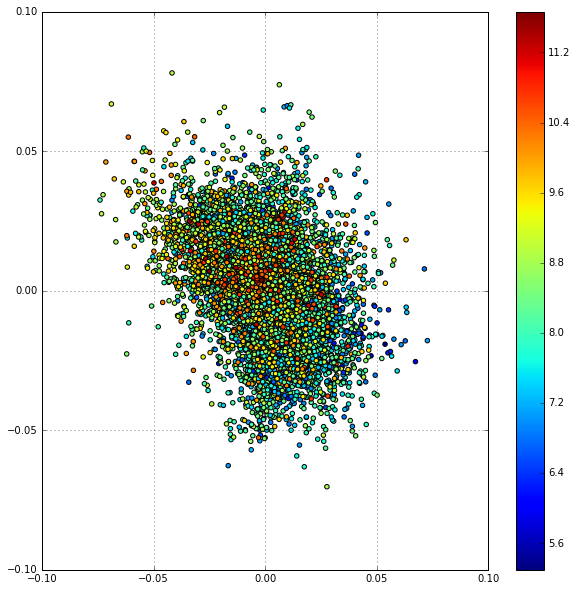

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(model.encoder.predict(X)[:, 0], model.encoder.predict(X)[:, 1], c=y)
plt.colorbar()
plt.grid()

In [5]:
# Save Variational Auto Encoder 
if not os.path.exists("model"):
    os.mkdir("model")
model.vae.save_weights("model/vae.hdf5")